# HIPT TCGA BRCA Splits statistics

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [ ]:
os.chdir('/data/pathology/projects/ais-cap/code/git/clemsgrs/hipt')

### Loading splits

In [2]:
fold_num = 0
dataset_name = 'tcga_brca'

In [3]:
fold_dir = Path(f'data/{dataset_name}/splits/fold_{fold_num}')
train_df = pd.read_csv(Path(fold_dir, 'train.csv'))
train_df.head()

,case_id,slide_id,label
0,TCGA-3C-AALI,TCGA-3C-AALI-01Z-00-DX1.F6E9A5DF-D8FB-45CF-B4B...,0
1,TCGA-3C-AALI,TCGA-3C-AALI-01Z-00-DX2.CF4496E0-AB52-4F3E-BDF...,0
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01Z-00-DX2.62DFE56B-B84C-40F9-962...,0
3,TCGA-3C-AALK,TCGA-3C-AALK-01Z-00-DX1.4E6EB156-BB19-410F-878...,0
4,TCGA-5L-AAT1,TCGA-5L-AAT1-01Z-00-DX1.F3449A5B-2AC4-4ED7-BF4...,1


In [4]:
train_df.label.value_counts().reset_index().rename(columns={'index': 'label', 'label': 'count'})

,label,count
0,0,597
1,1,118


What do we want to plot:

- label distribution
- nb slide

In [5]:
tmp = train_df[['slide_id', 'label']]
tmp['subtype'] = tmp['label'].apply(lambda x: 'IDC' if x == 0 else 'ILC')

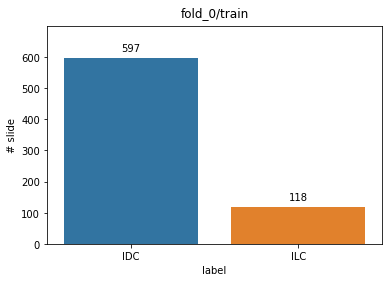

In [6]:
ax = sns.countplot(data=tmp, x='subtype')
ax.bar_label(ax.containers[0], padding=5)
plt.xlabel('label')
plt.ylabel('# slide')
plt.ylim(0,699)
plt.title(f'fold_{fold_num}/train', pad=10)
plt.show()

In [7]:
dfs = []
nfold = 10
for i in range(nfold):
    fold_dir = Path(f'data/{dataset_name}/splits/fold_{i}')
    train_df = pd.read_csv(Path(fold_dir, 'train.csv'))
    dfs.append(train_df.label.value_counts().reset_index().rename(columns={'index': 'label', 'label': 'count'}))

df = pd.concat(dfs)
df['subtype'] = df['label'].apply(lambda x: 'IDC' if x == 0 else 'ILC')
df.head()

,label,count,subtype
0,0,597,IDC
1,1,118,ILC
0,0,587,IDC
1,1,124,ILC
0,0,598,IDC


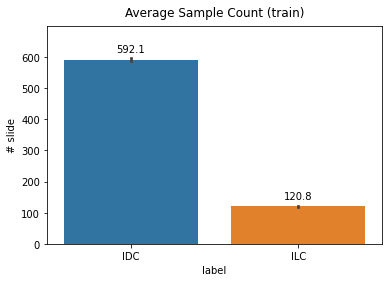

In [8]:
ax = sns.barplot(data=df, x='subtype', y='count', errorbar='sd')
ax.bar_label(ax.containers[0], padding=5)
plt.xlabel('label')
plt.ylabel('# slide')
plt.ylim(0,699)
plt.title(f'Average Sample Count (train)', pad=10)
plt.show()

In [9]:
dfs = []
nfold = 10
for i in range(nfold):
    fold_dir = Path(f'data/{dataset_name}/splits/fold_{i}')
    for partition in ['train', 'tune', 'test']:
        df = pd.read_csv(Path(fold_dir, f'{partition}.csv'))
        df = df.label.value_counts().reset_index().rename(columns={'index': 'label', 'label': 'count'})
        df['partition'] = [f'{partition}']*len(df)
        dfs.append(df)

df = pd.concat(dfs)
df['subtype'] = df['label'].apply(lambda x: 'IDC' if x == 0 else 'ILC')
df.head()

,label,count,partition,subtype
0,0,597,train,IDC
1,1,118,train,ILC
0,0,64,tune,IDC
1,1,15,tune,ILC
0,0,65,test,IDC


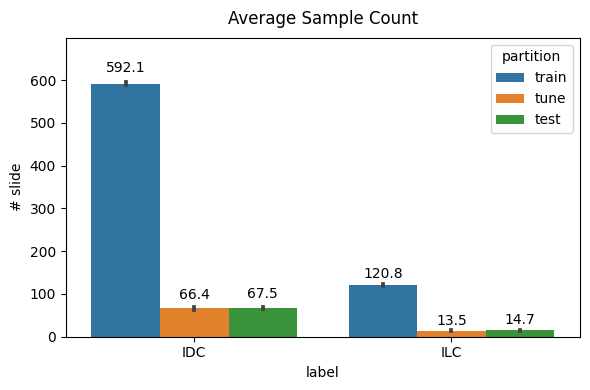

In [13]:
pad = 10
save = True

plt.figure(dpi=100)
ax = sns.barplot(data=df, x='subtype', y='count', hue='partition', errorbar='sd')
for i, p in enumerate(ax.patches):
    errbar = ax.lines[i].get_data()[1]
    std = errbar[1] - errbar[0]
    
    x, y = p.get_x(), p.get_y()
    w, h = p.get_width(), p.get_height()
    txt_x, txt_y = x+w/2, h+pad+std*2
    
    plt.text(txt_x, txt_y, f'{h}', horizontalalignment='center')

plt.xlabel('label')
plt.ylabel('# slide')
plt.ylim(0,699)
plt.title(f'Average Sample Count', pad=10)
plt.tight_layout()
if save:
    plt.savefig('average_sample_count.png', dpi=300)
plt.show()